<a href="https://colab.research.google.com/github/budialis/Data-Mining/blob/main/test_PCA01_evd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This source code is taken from https://www.askpython.com/python/examples/principal-component-analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced


In [4]:
#Get the IRIS dataset
url = "/content/drive/MyDrive/Data Mining/Iris.txt"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data

,sepal length,sepal width,petal length,petal width,target
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#prepare the data
x = data.iloc[1:,0:4]
x

,sepal length,sepal width,petal length,petal width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [6]:
#prepare the target
target = data.iloc[1:,4]
target

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: target, Length: 150, dtype: object

In [7]:
#Applying it to PCA function
mat_reduced = PCA(x.astype(float) , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
target.reset_index(drop=True, inplace=True)

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


In [8]:
mat_reduced

array([[ 2.68420713,  0.32660731],
       [ 2.71539062, -0.16955685],
       [ 2.88981954, -0.13734561],
       [ 2.7464372 , -0.31112432],
       [ 2.72859298,  0.33392456],
       [ 2.27989736,  0.74778271],
       [ 2.82089068, -0.08210451],
       [ 2.62648199,  0.17040535],
       [ 2.88795857, -0.57079803],
       [ 2.67384469, -0.1066917 ],
       [ 2.50652679,  0.65193501],
       [ 2.61314272,  0.02152063],
       [ 2.78743398, -0.22774019],
       [ 3.22520045, -0.50327991],
       [ 2.64354322,  1.1861949 ],
       [ 2.38386932,  1.34475434],
       [ 2.6225262 ,  0.81808967],
       [ 2.64832273,  0.31913667],
       [ 2.19907796,  0.87924409],
       [ 2.58734619,  0.52047364],
       [ 2.3105317 ,  0.39786782],
       [ 2.54323491,  0.44003175],
       [ 3.21585769,  0.14161557],
       [ 2.30312854,  0.10552268],
       [ 2.35617109, -0.03120959],
       [ 2.50791723, -0.13905634],
       [ 2.469056  ,  0.13788731],
       [ 2.56239095,  0.37468456],
       [ 2.63982127,

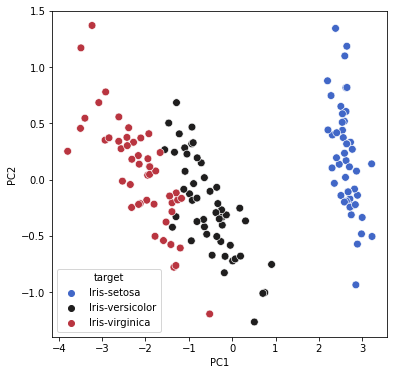

In [9]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(mat_reduced)
y_kmeans = kmeans.predict(mat_reduced)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

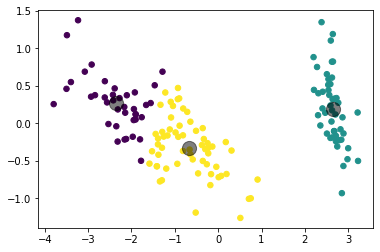

In [11]:
plt.scatter(mat_reduced[:, 0], mat_reduced[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


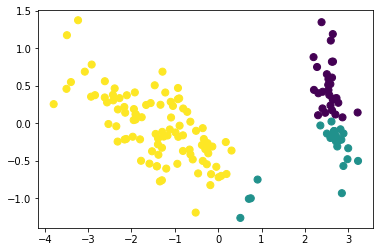

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(mat_reduced, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(mat_reduced.shape[0])[:n_clusters]
    centers = mat_reduced[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(mat_reduced, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([mat_reduced[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(mat_reduced, 3)
plt.scatter(mat_reduced[:, 0], mat_reduced[:, 1], c=labels,
            s=50, cmap='viridis');

In [13]:
display(labels)
display(centers)
display(mat_reduced)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([[ 2.56201651,  0.48649724],
       [ 2.4191517 , -0.37885469],
       [-1.40541808, -0.05731672]])

array([[ 2.68420713,  0.32660731],
       [ 2.71539062, -0.16955685],
       [ 2.88981954, -0.13734561],
       [ 2.7464372 , -0.31112432],
       [ 2.72859298,  0.33392456],
       [ 2.27989736,  0.74778271],
       [ 2.82089068, -0.08210451],
       [ 2.62648199,  0.17040535],
       [ 2.88795857, -0.57079803],
       [ 2.67384469, -0.1066917 ],
       [ 2.50652679,  0.65193501],
       [ 2.61314272,  0.02152063],
       [ 2.78743398, -0.22774019],
       [ 3.22520045, -0.50327991],
       [ 2.64354322,  1.1861949 ],
       [ 2.38386932,  1.34475434],
       [ 2.6225262 ,  0.81808967],
       [ 2.64832273,  0.31913667],
       [ 2.19907796,  0.87924409],
       [ 2.58734619,  0.52047364],
       [ 2.3105317 ,  0.39786782],
       [ 2.54323491,  0.44003175],
       [ 3.21585769,  0.14161557],
       [ 2.30312854,  0.10552268],
       [ 2.35617109, -0.03120959],
       [ 2.50791723, -0.13905634],
       [ 2.469056  ,  0.13788731],
       [ 2.56239095,  0.37468456],
       [ 2.63982127,

In [14]:
# mengubah y_kmeans dari numpy array ke pandas dataframe
y_kmeans = pd.DataFrame(y_kmeans , columns = ['kmeans'])

# mengubah labels dari numpy array ke pandas dataframe
labels = pd.DataFrame(labels , columns = ['pairwise_distances_argmin'])


In [15]:
#
principal_evd = pd.concat([principal_df , pd.DataFrame(labels), pd.DataFrame(y_kmeans)] , axis = 1)


In [16]:
principal_evd['target'] = pd.factorize(principal_evd['target'])[0]
principal_evd['target']


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [18]:
#menghitung jumlah cluster pairwise_distances_argmin yang bernilai True terhadap target
print(sum(principal_evd['target'] == principal_evd['pairwise_distances_argmin']))

#menghitung jumlah cluster kmeans yang bernilai True terhadap target
print(sum(principal_evd['target'] == principal_evd['kmeans']))

#menghitung jumlah cluster kmeans yang bernilai True
print(sum(principal_evd['pairwise_distances_argmin'] == principal_evd['kmeans']))

84
14
77


In [17]:
principal_evd

,PC1,PC2,target,pairwise_distances_argmin,kmeans
0,2.684207,0.326607,0,0,1
1,2.715391,-0.169557,0,1,1
2,2.889820,-0.137346,0,1,1
3,2.746437,-0.311124,0,1,1
4,2.728593,0.333925,0,0,1
...,...,...,...,...,...
145,-1.944017,0.187415,2,2,0
146,-1.525664,-0.375021,2,2,2
147,-1.764046,0.078519,2,2,0
148,-1.901629,0.115877,2,2,0
